Optimal alpha: 0.4981029468070648
Optimal beta: -0.18178309353150865
Optimal gamma: -0.25529884589065066
Optimal delta: -0.7034897082244665


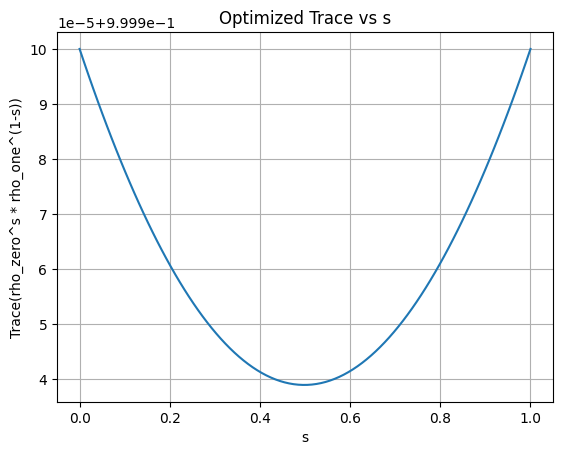

Minimum trace value: 0.9999389979942588
Minimum trace value: 0.9999389979942588 at s = 0.494949494949495
0.5931203633847285


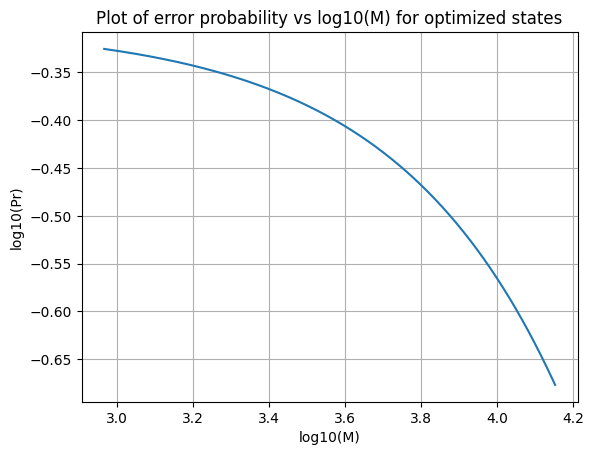

In [8]:
import numpy as np
from qutip import *
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Function to normalize values
def normalize_values(alpha, beta, gamma, delta):
    total = abs(alpha) + abs(beta) + abs(gamma) + abs(delta)
    if total == 0:
        raise ValueError("The sum of the values is zero; cannot normalize.")
    alpha_norm = alpha / total
    beta_norm = beta / total
    gamma_norm = gamma / total
    delta_norm = delta / total
    return alpha_norm, beta_norm, gamma_norm, delta_norm

# Function to create state
def state(alpha, beta, gamma, delta, dim):
    state = (
        alpha * tensor(fock(dim, 0), fock(dim, 0)) +
        beta * tensor(fock(dim, 0), fock(dim, 1)) +
        gamma * tensor(fock(dim, 1), fock(dim, 0)) +
        delta * tensor(fock(dim, 1), fock(dim, 1))
    )
    return state.unit()

# Function to calculate idler density matrix
def idler_density(psi_s_i):
    rho = ket2dm(psi_s_i)
    idler_rho = ptrace(rho, 1)  # Trace out the first subsystem
    return idler_rho

# Fractional power function
def fractional_power(rho, s):
    eigvals, eigvecs = rho.eigenstates()
    eigvals = np.clip(eigvals, 1e-10, None)  # Avoid very small values
    eigvals = np.array([val ** s for val in eigvals])
    return sum(eig * eigvec * eigvec.dag() for eig, eigvec in zip(eigvals, eigvecs))

# Function to calculate trace of rho_s * rho_1_minus_s
def trace_rho_s_rho_1_minus_s(alpha, beta, gamma, delta, s, dim, b, eta):
    # Normalize alpha, beta, gamma, delta
    alpha, beta, gamma, delta = normalize_values(alpha, beta, gamma, delta)

    # Create state
    psi = state(alpha, beta, gamma, delta, dim)

    # Idler density matrix
    idler_dm = idler_density(psi)

    # Define rho_zero and rho_one
    rho_zero = tensor(thermal_dm(dim, b), idler_dm)
    rho_one = eta * ket2dm(psi) + (1 - eta) * rho_zero

    # Calculate trace
    rho_zero_s = fractional_power(rho_zero, s)
    rho_one_1_minus_s = fractional_power(rho_one, 1 - s)
    return (rho_zero_s * rho_one_1_minus_s).tr().real

# Objective function to minimize the trace over s
def objective(params, dim, b, eta):
    alpha, beta, gamma, delta = params
    s_values = np.linspace(0, 1, 100)
    trace_values = [trace_rho_s_rho_1_minus_s(alpha, beta, gamma, delta, s, dim, b, eta) for s in s_values]
    return min(trace_values)  # We are minimizing the minimum trace value

# Initial parameters and dimensions
dim = 8
b = 1  # Mean thermal photons
eta = 0.01

# Initial guess for alpha, beta, gamma, delta (you can tweak this)
initial_guess = [0.5, 0.1, -0.5,- 0.5]

# Set bounds for the parameters (if required)
bounds = [(-1, 1), (-1, 1), (-1, 1), (-1, 1)]  # Adjust the bounds as per your needs

# Perform the optimization using minimize from scipy
result = minimize(objective, initial_guess, args=(dim, b, eta), method='L-BFGS-B', bounds=bounds)

# Get the optimal parameters
optimal_alpha, optimal_beta, optimal_gamma, optimal_delta = result.x

# Print results
print("Optimal alpha:", optimal_alpha)
print("Optimal beta:", optimal_beta)
print("Optimal gamma:", optimal_gamma)
print("Optimal delta:", optimal_delta)

# Calculate trace values for the optimized parameters
s_values = np.linspace(0, 1, 100)
trace_values = [trace_rho_s_rho_1_minus_s(optimal_alpha, optimal_beta, optimal_gamma, optimal_delta, s, dim, b, eta) for s in s_values]

# Find the minimum trace value
min_trace_value = min(trace_values)

# Plotting trace vs s for the optimized parameters
plt.plot(s_values, trace_values)
plt.xlabel('s')
plt.ylabel('Trace(rho_zero^s * rho_one^(1-s))')
plt.title('Optimized Trace vs s')
plt.grid(True)
plt.show()

# Print the minimum trace value
print(f"Minimum trace value: {min_trace_value}")


# Finding minimum trace value
min_trace_value = min(trace_values)
min_trace_index = trace_values.index(min_trace_value)
min_s_value = s_values[min_trace_index]

print(f"Minimum trace value: {min_trace_value} at s = {min_s_value}")
factor = optimal_beta**2 + optimal_gamma**2 + optimal_delta**2
print(factor)

# Generate log10(M) values ranging from log10(10^5 * factor) to log10(10^7 * factor)
log10_M_values = np.linspace(5 * factor, 7 * factor, 500)

# Compute M values from the log10 values
M_values = 10 ** log10_M_values

# Compute constants for the formula
log10_0_5 = np.log10(0.5)
log10_0_992 = np.log10(min_trace_value)

# Calculate the result
result = log10_0_5 + M_values * log10_0_992

# Plot the result
plt.plot(log10_M_values, result)
plt.xlabel('log10(M)')
plt.ylabel('log10(Pr)')
plt.title('Plot of error probability vs log10(M) for optimized states')
plt.grid(True)
plt.show()


Optimal alpha: 0.49995048410164794
Optimal beta: 0.012504957745995547
Optimal gamma: 0.01256342917394858
Optimal delta: 0.013630539847089394


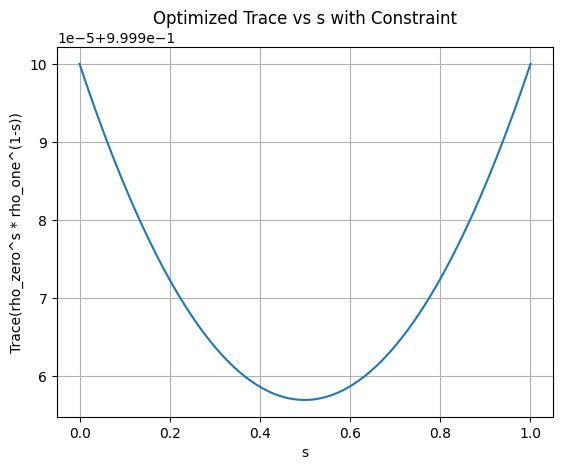

Minimum trace value: 0.9999569388419332
Minimum trace value: 0.9999569388419332 at s = 0.494949494949495
0.000500005337361048


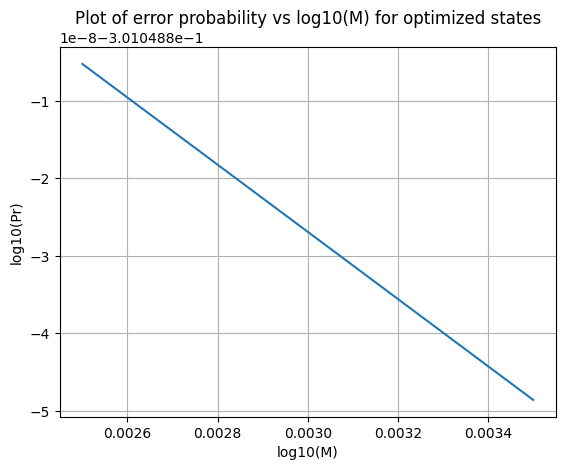

In [16]:
import numpy as np
from qutip import *
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Function to normalize values
def normalize_values(alpha, beta, gamma, delta):
    total = abs(alpha) + abs(beta) + abs(gamma) + abs(delta)
    if total == 0:
        raise ValueError("The sum of the values is zero; cannot normalize.")
    alpha_norm = alpha / total
    beta_norm = beta / total
    gamma_norm = gamma / total
    delta_norm = delta / total
    return alpha_norm, beta_norm, gamma_norm, delta_norm

# Function to create state
def state(alpha, beta, gamma, delta, dim):
    state = (
        alpha * tensor(fock(dim, 0), fock(dim, 0)) +
        beta * tensor(fock(dim, 0), fock(dim, 1)) +
        gamma * tensor(fock(dim, 1), fock(dim, 0)) +
        delta * tensor(fock(dim, 1), fock(dim, 1))
    )
    return state.unit()

# Function to calculate idler density matrix
def idler_density(psi_s_i):
    rho = ket2dm(psi_s_i)
    idler_rho = ptrace(rho, 1)  # Trace out the first subsystem
    return idler_rho

# Fractional power function
def fractional_power(rho, s):
    eigvals, eigvecs = rho.eigenstates()
    eigvals = np.clip(eigvals, 1e-10, None)  # Avoid very small values
    eigvals = np.array([val ** s for val in eigvals])
    return sum(eig * eigvec * eigvec.dag() for eig, eigvec in zip(eigvals, eigvecs))

# Function to calculate trace of rho_s * rho_1_minus_s
def trace_rho_s_rho_1_minus_s(alpha, beta, gamma, delta, s, dim, b, eta):
    # Normalize alpha, beta, gamma, delta
    alpha, beta, gamma, delta = normalize_values(alpha, beta, gamma, delta)

    # Create state
    psi = state(alpha, beta, gamma, delta, dim)

    # Idler density matrix
    idler_dm = idler_density(psi)

    # Define rho_zero and rho_one
    rho_zero = tensor(thermal_dm(dim, b), idler_dm)
    rho_one = eta * ket2dm(psi) + (1 - eta) * rho_zero

    # Calculate trace
    rho_zero_s = fractional_power(rho_zero, s)
    rho_one_1_minus_s = fractional_power(rho_one, 1 - s)
    return (rho_zero_s * rho_one_1_minus_s).tr().real

# Objective function to minimize the trace over s
def objective(params, dim, b, eta):
    alpha, beta, gamma, delta = params
    s_values = np.linspace(0, 1, 100)
    trace_values = [trace_rho_s_rho_1_minus_s(alpha, beta, gamma, delta, s, dim, b, eta) for s in s_values]
    return min(trace_values)  # We are minimizing the minimum trace value

# Constraint function for beta^2 + gamma^2 + delta^2 = 0.01
def constraint(params):
    _, beta, gamma, delta = params
    return beta**2 + gamma**2 + delta**2 - 0.0005

# Initial parameters and dimensions
dim = 10
b = 4  # Mean thermal photons
eta = 0.01

# Initial guess for alpha, beta, gamma, delta (you can tweak this)
initial_guess = [0.5, 0.5, 0.5, 0.5]

# Set bounds for the parameters (if required)
bounds = [(-1, 1), (-1, 1), (-1, 1), (-1, 1)]  # Adjust the bounds as per your needs

# Define the constraint
cons = {'type': 'eq', 'fun': constraint}

# Perform the optimization using minimize from scipy
result = minimize(objective, initial_guess, args=(dim, b, eta), method='SLSQP', bounds=bounds, constraints=cons)

# Get the optimal parameters
optimal_alpha, optimal_beta, optimal_gamma, optimal_delta = result.x

# Print results
print("Optimal alpha:", optimal_alpha)
print("Optimal beta:", optimal_beta)
print("Optimal gamma:", optimal_gamma)
print("Optimal delta:", optimal_delta)

# Calculate trace values for the optimized parameters
s_values = np.linspace(0, 1, 100)
trace_values = [trace_rho_s_rho_1_minus_s(optimal_alpha, optimal_beta, optimal_gamma, optimal_delta, s, dim, b, eta) for s in s_values]

# Find the minimum trace value
min_trace_value = min(trace_values)

# Plotting trace vs s for the optimized parameters
plt.plot(s_values, trace_values)
plt.xlabel('s')
plt.ylabel('Trace(rho_zero^s * rho_one^(1-s))')
plt.title('Optimized Trace vs s with Constraint')
plt.grid(True)
plt.show()

# Print the minimum trace value
print(f"Minimum trace value: {min_trace_value}")
# Finding minimum trace value
min_trace_value = min(trace_values)
min_trace_index = trace_values.index(min_trace_value)
min_s_value = s_values[min_trace_index]

print(f"Minimum trace value: {min_trace_value} at s = {min_s_value}")
factor = optimal_beta**2 + optimal_gamma**2 + optimal_delta**2
print(factor)

# Generate log10(M) values ranging from log10(10^5 * factor) to log10(10^7 * factor)
log10_M_values = np.linspace(5 * factor, 7 * factor, 500)

# Compute M values from the log10 values
M_values = 10 ** log10_M_values

# Compute constants for the formula
log10_0_5 = np.log10(0.5)
log10_0_992 = np.log10(min_trace_value)

# Calculate the result
result = log10_0_5 + M_values * log10_0_992

# Plot the result
plt.plot(log10_M_values, result)
plt.xlabel('log10(M)')
plt.ylabel('log10(Pr)')
plt.title('Plot of error probability vs log10(M) for optimized states')
plt.grid(True)
plt.show()


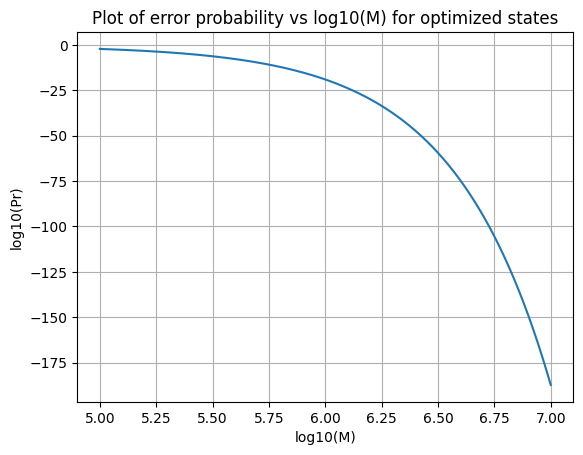

In [17]:
log10_M_values = np.linspace(5 , 7 , 5000)

# Compute M values from the log10 values
M_values = 10 ** log10_M_values

# Compute constants for the formula
log10_0_5 = np.log10(0.5)
log10_0_992 = np.log10(0.9999569388419332)

# Calculate the result
result = log10_0_5 + M_values * log10_0_992

# Plot the result
plt.plot(log10_M_values, result)
plt.xlabel('log10(M)')
plt.ylabel('log10(Pr)')
plt.title('Plot of error probability vs log10(M) for optimized states')
plt.grid(True)
plt.show()